# Enhanced RAG Pipeline
This notebook demonstrates how to use the enhanced modular RAG pipeline for systematic A/B testing and experiment tracking.

In [1]:
# Basic imports
import asyncio
import pandas as pd
from pathlib import Path

# Import enhanced modules
from core.experiment_config import (
    ExperimentConfig, LoaderConfig, ChunkerConfig, 
    EmbeddingConfig, StorageConfig, RetrievalConfig, GenerationConfig
)
from system.experiment_runner import ExperimentRunner
from utils.experiment_analysis import ExperimentAnalyzer
from utils.helpers import create_project_directories, verify_api_keys

# Setup directories
create_project_directories()

# Verify API keys
api_keys = verify_api_keys()
if not api_keys.get("OPENAI_API_KEY"):
    print("Please set OPENAI_API_KEY in your .env file")

Created documents directory: ./documents
Created data directory: ./data
Created configs directory: ./configs
Created results directory: ./results
Created logs directory: ./logs
OPENAI_API_KEY is configured
ANTHROPIC_API_KEY is not set


In [2]:
# Define your test questions
test_questions = [
    {
        "question": "What is the main topic of the document?",
        "reference": "The document discusses RAG pipelines and their evaluation."  # Optional
    },
    {
        "question": "What methodology is described?",
        "reference": "The methodology involves retrieval-augmented generation with modular components."
    },
    {
        "question": "What are the key findings?",
        "reference": None  # No reference for this question
    }
]

# Path to your documents
DOCUMENT_PATH = "./documents"  # Update this path

## Initializing RAG System Components

Document processor initialized
Initialized embeddings with model: text-embedding-3-small
Vector store manager initialized
Component factories initialized (Retriever and Generator)
Pipeline builder initialized
Initialized metric: faithfulness
Initialized metric: answer_relevancy
Initialized metric: context_precision
Evaluation orchestrator initialized


## Document Processing

Loading PDFs from directory: `./documents`

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 236 0 (offset 0)
Ignoring wrong pointing object 670 0 (offset 0)
Ignoring wrong pointing object 1329 0 (offset 0)
Ignoring wrong pointing object 1330 0 (offset 0)


### Loading Summary

Loaded 224 document pages


#### First Document Preview:

Source: documents/kb.pdf
Page: 0
Content preview: RAG KNOWLEDGE BASE 
 
Explaining the Streamlit platform 
 
1. Experiment design tab: calculating sample sizes before running an 
experiment 
Purpose: Before launching an A/B test, we want to calculate...


### Chunking Summary

Created 1161 chunks from 224 documents
Average chunk size: 418 characters


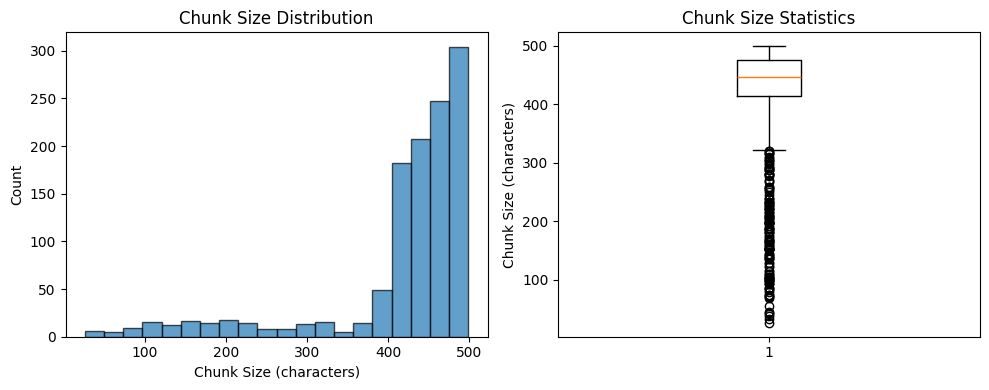


Chunk Statistics:
  - Min size: 26 chars
  - Max size: 499 chars
  - Mean size: 418 chars
  - Total chunks: 1161


## Vector Store Management

### Creating FAISS Vector Store

Processing 1161 chunks...
FAISS index saved to: ./data/faiss_index
Vector store created successfully


## Building RAG Pipeline

Created vector retriever
Created openai generator
Built linear pipeline


### Query: What is the main topic of the document?

### Answer:
The main topic of the document appears to be focused on improving user experience and conversion rates on websites. It discusses:

- Common pain points visitors face, such as confusing copy and difficulty finding call-to-action (CTA) buttons, which can lead to a bad user experience and increased friction.
- The importance of analyzing visitor behavior to enhance website effectiveness.
- Strategies for optimizing website content, including A/B testing and using AI-powered tools for text generation.

Overall, the document emphasizes the significance of addressing user experience issues to improve conversion rates.


Response time: 3.71 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 0.9999988428542511
Evaluating context_precision...
context_precision score: 0.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,1.0,0.999999,0.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.769708,0.158974,0.428789


### Query: What methodology is described?

### Answer:
The methodology described in the context involves several key components related to the evaluation and analysis of research reports and statistical models:

- **Detailed Reporting**: Research reports, including meta-analyses, should provide a comprehensive account of:
  - The motivation for the study
  - The study design
  - The original analysis plan
  - Criteria for including and excluding subjects or studies
  - A thorough description of all analyses conducted

- **Statistical Methods**: It is noted that no statistical method is immune to misinterpretation and misuse.

- **CUPED Method**: A specific method mentioned is CUPED, which uses pre-experiment data to reduce variance in results, thereby decreasing the standard error for a given metric and sample size.

- **Modeling Assumptions**: The context highlights the importance of defining the scope of a statistical model to accurately represent observed data and hypothetical alternatives. It also points out that many analysis choices are often made post-data collection, which can complicate understanding and assessing underlying assumptions.

- **Statistical Models**: The statistical model is described as a mathematical representation of data variability, which ideally captures all sources of variability. However, it often incorporates unrealistic or unjustified assumptions, even in non-parametric methods.

Overall, the methodology emphasizes the need for transparency in reporting and the careful consideration of assumptions in statistical modeling.


Response time: 6.79 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 0.8947368421052632
Evaluating answer_relevancy...
answer_relevancy score: 0.8712703867818953
Evaluating context_precision...
context_precision score: 0.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,0.894737,0.87127,0.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.379169,0.331683,0.82101


### Query: What are the key findings?

### Answer:
The key findings from the provided context are:

- **Misinterpretation of Statistics**: Statistical tests are often misinterpreted, leading to potential confusion about their implications. It is important to consider the entire context of research reports when interpreting statistics and conclusions.

- **Importance of Comprehensive Analysis**: It is crucial to examine and synthesize all results related to a scientific question rather than focusing solely on individual findings. Statistical tests should not be the only basis for inferences or decisions regarding associations or effects.

- **P-Value Considerations**: The method used by Wise Pizza does not correct p-values for multiple comparisons, which may lead to results appearing significant by chance. However, it attempts to minimize false positives by highlighting segments with large and meaningful effects.

- **Transparency in Research Reporting**: Research reports, including meta-analyses, should provide a detailed account of the study's motivation, design, analysis plan, and criteria for including or excluding subjects and data to allow for critical evaluation.

- **Political and Practical Challenges**: Addressing issues related to the funding of studies and the potential bias in reporting results requires significant political will and effort, beyond just correcting statistical misinterpretations. 

Overall, the findings emphasize the need for careful interpretation of statistical results, comprehensive analysis, and transparency in research reporting.


Response time: 6.56 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: False
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 0.6666666666666666
Evaluating answer_relevancy...
answer_relevancy score: 0.8941190520219423
Skipping context_precision - no reference


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,0.666667,0.894119,N/A (no reference provided)


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.435751,0.333333,0.843792


Variant ID: c6c1fa4e
Configuration: {'loader': 'text', 'chunker': 'recursive_500', 'embedding': 'openai_text-embedding-3-small', 'storage': 'faiss', 'retrieval': 'vector_k5', 'generation': 'openai_gpt-4o-mini'}


In [3]:
# Create a single configuration
single_config = ExperimentConfig(
    experiment_name="single_test",
    tags=["test", "baseline"],
    
    # Loader configuration
    loader=LoaderConfig(
        type="text",
        pdf_extract_images=False
    ),
    
    # Chunker configuration  
    chunker=ChunkerConfig(
        method="recursive",
        chunk_size=500,
        chunk_overlap=50
    ),
    
    # Embedding configuration
    embedding=EmbeddingConfig(
        provider="openai",
        model="text-embedding-3-small"
    ),
    
    # Storage configuration
    storage=StorageConfig(
        type="faiss",
        persist=True
    ),
    
    # Retrieval configuration
    retrieval=RetrievalConfig(
        strategy="vector",
        top_k=5
    ),
    
    # Generation configuration
    generation=GenerationConfig(
        provider="openai",
        model="gpt-4o-mini",
        temperature=0.0
    )
)

# Run single experiment
runner = ExperimentRunner()
results = await runner.run_experiment(
    config=single_config,
    test_questions=test_questions,
    document_path=DOCUMENT_PATH
)

print(f"Variant ID: {results['variant_id']}")
print(f"Configuration: {results['variant_description']}")

In [4]:
# Define base configuration
base_config = ExperimentConfig(
    experiment_name="grid_search_example",
    tags=["grid_search", "comprehensive"]
)

# Define variants to test
variants = {
    # Test different chunking methods and sizes
    "chunker.method": ["semantic"],
    "chunker.chunk_size": [700],
    
    # Test different embedding modelsI
    "embedding.model": ["text-embedding-3-small"],
    
    # Test different retrieval strategies
    "retrieval.strategy": ["vector", "hybrid"],
    "retrieval.top_k": [3, 5],
    
    # Test different generation temperatures
    "generation.temperature": [0.7]
}

# Calculate total variants
total_variants = 1
for values in variants.values():
    total_variants *= len(values)
print(f"Total configurations to test: {total_variants}")

Total configurations to test: 4


Starting grid search with 6 variant dimensions
Created 4 configuration variants

Running variant 1/4
Variant: {'loader': 'text', 'chunker': 'semantic_700', 'embedding': 'openai_text-embedding-3-small', 'storage': 'faiss', 'retrieval': 'vector_k3', 'generation': 'openai_gpt-4o-mini'}


## Initializing RAG System Components

Document processor initialized
Initialized embeddings with model: text-embedding-3-small
Vector store manager initialized
Component factories initialized (Retriever and Generator)
Pipeline builder initialized
Initialized metric: faithfulness
Initialized metric: answer_relevancy
Initialized metric: context_precision
Evaluation orchestrator initialized


## Document Processing

Loading PDFs from directory: `./documents`

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 236 0 (offset 0)
Ignoring wrong pointing object 670 0 (offset 0)
Ignoring wrong pointing object 1329 0 (offset 0)
Ignoring wrong pointing object 1330 0 (offset 0)


### Loading Summary

Loaded 224 document pages


#### First Document Preview:

Source: documents/kb.pdf
Page: 0
Content preview: RAG KNOWLEDGE BASE 
 
Explaining the Streamlit platform 
 
1. Experiment design tab: calculating sample sizes before running an 
experiment 
Purpose: Before launching an A/B test, we want to calculate...


### Chunking Summary

Created 837 chunks from 224 documents
Average chunk size: 578 characters


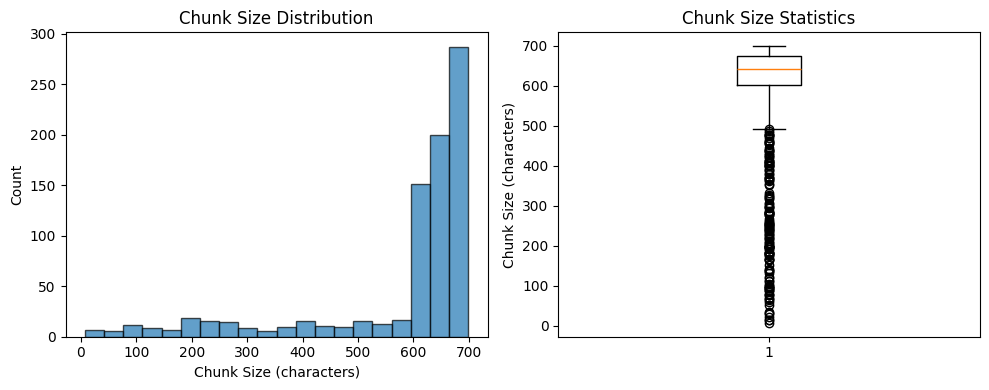


Chunk Statistics:
  - Min size: 7 chars
  - Max size: 699 chars
  - Mean size: 578 chars
  - Total chunks: 837


## Vector Store Management

### Creating FAISS Vector Store

Processing 837 chunks...
FAISS index saved to: ./data/faiss_index
Vector store created successfully


## Building RAG Pipeline

Created vector retriever
Created openai generator
Built linear pipeline


### Query: What is the main topic of the document?

### Answer:
The main topic of the document is about creating effective website content that engages visitors and increases conversion rates. It emphasizes the importance of writing style, content depth, and resonating with the target audience to improve usability and answer user questions. Specific strategies include addressing the end-user directly and A/B testing content length to determine what resonates best with the audience.


Response time: 2.94 seconds
Used 3 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 1.0000000000000004
Evaluating context_precision...
context_precision score: 0.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,1.0,1.0,0.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.860126,0.172185,0.687959


### Query: What methodology is described?

### Answer:
The methodology described is CUPED, which stands for "Controlled-experiment Using Pre-Experiment Data." It is noted for its popularity in decreasing the standard error for a metric while using the same sample size. CUPED utilizes pre-experiment data to help explain away some of the variance in the result data. As stated in the context:

- "CUPED is an extremely popular implementation that uses pre-experiment data to explain away some of the variance in the result data."


Response time: 2.96 seconds
Used 3 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 0.6666666666666666
Evaluating answer_relevancy...
answer_relevancy score: 0.7531458137678048
Evaluating context_precision...
context_precision score: 0.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,0.666667,0.753146,0.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.884259,0.169591,0.680693


### Query: What are the key findings?

### Answer:
The context provided does not explicitly outline any specific key findings. However, it does include several important notes regarding statistical evaluation:

- Wise Pizza does not correct p-values for multiple comparisons, which means that significant results may occur by chance, particularly when testing numerous segments.
- The method aims to reduce false positives by focusing on segments that show large and meaningful effects.
- For each variant vs control comparison, the evaluation includes:
  - Mean values of outcome metrics for control and treatment groups.
  - Estimated treatment effect calculated as mean of treatment minus mean of control.
  - p-value indicating statistical significance of the effect.
  
Additionally, there is an emphasis on understanding customer behavior and insights gained from the tests, as well as the importance of detailing the sequence of events leading to the statistical results in research reports. 

Overall, while no specific findings are presented, the context highlights the importance of careful statistical evaluation and understanding customer reactions.


Response time: 5.80 seconds
Used 3 context chunks


### Evaluation Results

Evaluating with reference: False
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 0.0
Skipping context_precision - no reference


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,1.0,0.0,N/A (no reference provided)


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.413148,0.318436,0.91981


Error in variant 1: name 'asdict' is not defined

Running variant 2/4
Variant: {'loader': 'text', 'chunker': 'semantic_700', 'embedding': 'openai_text-embedding-3-small', 'storage': 'faiss', 'retrieval': 'vector_k5', 'generation': 'openai_gpt-4o-mini'}


## Initializing RAG System Components

Document processor initialized
Initialized embeddings with model: text-embedding-3-small
Vector store manager initialized
Component factories initialized (Retriever and Generator)
Pipeline builder initialized
Initialized metric: faithfulness
Initialized metric: answer_relevancy
Initialized metric: context_precision
Evaluation orchestrator initialized


## Document Processing

Loading PDFs from directory: `./documents`

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 236 0 (offset 0)
Ignoring wrong pointing object 670 0 (offset 0)
Ignoring wrong pointing object 1329 0 (offset 0)
Ignoring wrong pointing object 1330 0 (offset 0)


### Loading Summary

Loaded 224 document pages


#### First Document Preview:

Source: documents/kb.pdf
Page: 0
Content preview: RAG KNOWLEDGE BASE 
 
Explaining the Streamlit platform 
 
1. Experiment design tab: calculating sample sizes before running an 
experiment 
Purpose: Before launching an A/B test, we want to calculate...


### Chunking Summary

Created 837 chunks from 224 documents
Average chunk size: 578 characters


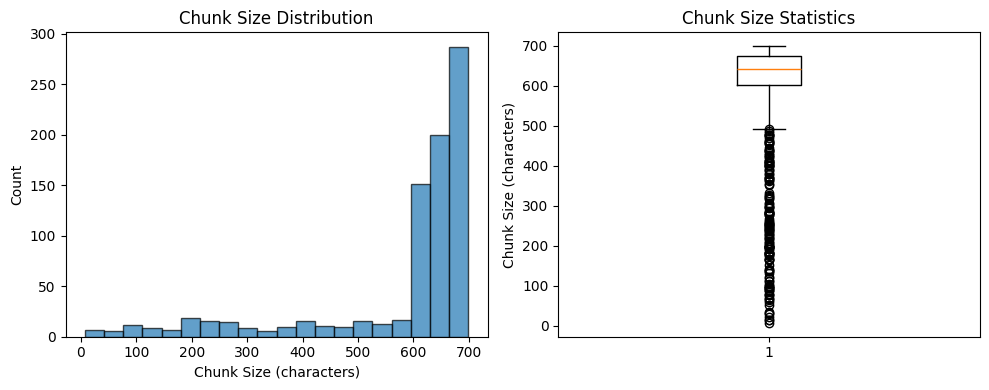


Chunk Statistics:
  - Min size: 7 chars
  - Max size: 699 chars
  - Mean size: 578 chars
  - Total chunks: 837


## Vector Store Management

### Creating FAISS Vector Store

Processing 837 chunks...
FAISS index saved to: ./data/faiss_index
Vector store created successfully


## Building RAG Pipeline

Created vector retriever
Created openai generator
Built linear pipeline


### Query: What is the main topic of the document?

### Answer:
The main topic of the document revolves around effective website content creation and optimization strategies. It discusses:

- The importance of clearly stating what visitors will gain from the website.
- The significance of writing style and addressing the target audience.
- The varying preferences of website visitors regarding content depth and the value of A/B testing.
- The need for objectivity in conversion rate optimization (CRO) through a prioritization framework.

Overall, the document emphasizes how to enhance website content to improve user engagement and conversions.


Response time: 2.74 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 0.75
Evaluating answer_relevancy...
answer_relevancy score: 0.8816627402558445
Evaluating context_precision...
context_precision score: 0.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,0.75,0.881663,0.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.975197,0.110294,0.752778


### Query: What methodology is described?

### Answer:
The methodology described in the context includes:

- **CUPED**: This is a method aimed at decreasing standard error by using pre-experiment data to reduce variance in result data. It is noted as an "extremely popular implementation" for this purpose.

- **Hypothesis Testing**: This is mentioned as a basic framework for statistical inference in A/B testing scenarios, which was established at the beginning of the A/B testing era.

- **Bayesian Framework for A/B Testing**: This methodology is indicated as a more complex approach compared to traditional hypothesis testing, involving advanced statistical concepts like Prior, Posterior, Bayes Theorem, and others.

These methodologies reflect different approaches to statistical analysis and data interpretation within the context of A/B testing.


Response time: 3.73 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: True
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 1.0
Evaluating answer_relevancy...
answer_relevancy score: 0.8917463412097532
Evaluating context_precision...
context_precision score: 0.0


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,1.0,0.891746,0.0


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.892665,0.159091,0.424061


### Query: What are the key findings?

### Answer:
The key findings from the provided context are as follows:

- **P-values and Multiple Comparisons**: Wise Pizza does not correct p-values for multiple comparisons, which may result in some results appearing significant by chance. However, it aims to minimize false positives by focusing on segments with large and meaningful effects.

- **Evaluation for Segments**: For each variant vs. control comparison, the evaluation includes:
  - Mean values of outcome metrics for both control and treatment groups.
  - Estimated treatment effect calculated as mean of treatment minus mean of control.
  - P-value indicating statistical significance of the treatment effect.

- **Understanding Customer Behavior**: It is crucial to analyze why customers reacted differently to various versions, emphasizing the need for visitor insights.

- **Research Report Requirements**: Detailed description of the study's motivation, design, analysis plan, inclusion/exclusion criteria, and analyses conducted is essential for critical evaluation.

- **Statistical Misinterpretation**: No statistical method is immune to misinterpretation, and users should avoid simplistic classifications of p-values into "significant" and "nonsignificant."

- **Abandonment of Inconclusive Results**: Many studies are abandoned due to inconclusive results, which can be attributed to three main reasons (though the reasons are not specified in the provided excerpts).

- **Reliability of Conclusions**: Collaborative approaches can help identify biases or errors and improve the reliability of conclusions.

- **Monitoring Effect Sizes**: Checking effect sizes over time can reveal trends and stability of observed effects.

- **Correcting for Biases in Sequential Testing**: It is important to correct biases introduced by sequential testing to ensure accuracy and reliability of reported effect sizes.


Response time: 8.88 seconds
Used 5 context chunks


### Evaluation Results

Evaluating with reference: False
Metrics to evaluate: ['faithfulness', 'answer_relevancy', 'context_precision']
Evaluating faithfulness...
faithfulness score: 0.8947368421052632
Evaluating answer_relevancy...
answer_relevancy score: 0.88286532063171
Skipping context_precision - no reference


#### RAGAS Metrics

,faithfulness,answer_relevancy,context_precision
0,0.894737,0.882865,N/A (no reference provided)


#### Custom Metrics

,answer_length,context_coverage,response_time
0,0.28112,0.36214,0.611627


Error in variant 2: name 'asdict' is not defined

Running variant 3/4
Variant: {'loader': 'text', 'chunker': 'semantic_700', 'embedding': 'openai_text-embedding-3-small', 'storage': 'faiss', 'retrieval': 'hybrid_k3', 'generation': 'openai_gpt-4o-mini'}


## Initializing RAG System Components

Document processor initialized
Initialized embeddings with model: text-embedding-3-small
Vector store manager initialized
Component factories initialized (Retriever and Generator)
Pipeline builder initialized
Initialized metric: faithfulness
Initialized metric: answer_relevancy
Initialized metric: context_precision
Evaluation orchestrator initialized


## Document Processing

Loading PDFs from directory: `./documents`

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 236 0 (offset 0)
Ignoring wrong pointing object 670 0 (offset 0)
Ignoring wrong pointing object 1329 0 (offset 0)
Ignoring wrong pointing object 1330 0 (offset 0)


### Loading Summary

Loaded 224 document pages


#### First Document Preview:

Source: documents/kb.pdf
Page: 0
Content preview: RAG KNOWLEDGE BASE 
 
Explaining the Streamlit platform 
 
1. Experiment design tab: calculating sample sizes before running an 
experiment 
Purpose: Before launching an A/B test, we want to calculate...


### Chunking Summary

Created 837 chunks from 224 documents
Average chunk size: 578 characters


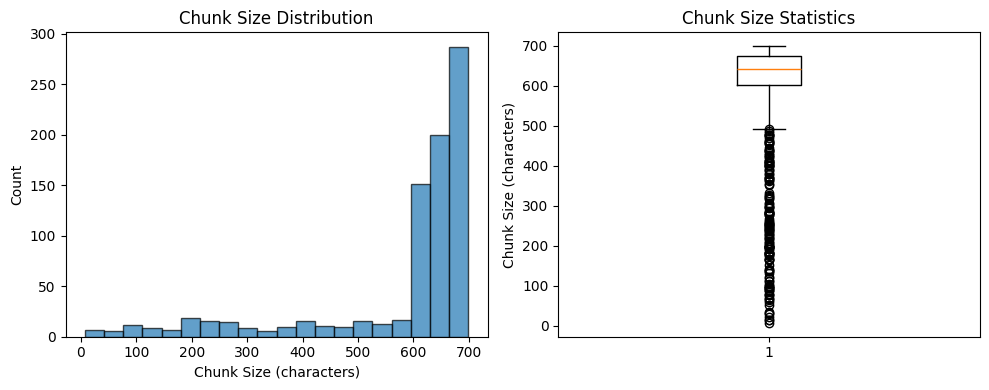


Chunk Statistics:
  - Min size: 7 chars
  - Max size: 699 chars
  - Mean size: 578 chars
  - Total chunks: 837


## Vector Store Management

### Creating FAISS Vector Store

Processing 837 chunks...
FAISS index saved to: ./data/faiss_index
Vector store created successfully


## Building RAG Pipeline

Error in variant 3: Could not import rank_bm25, please install with `pip install rank_bm25`.

Running variant 4/4
Variant: {'loader': 'text', 'chunker': 'semantic_700', 'embedding': 'openai_text-embedding-3-small', 'storage': 'faiss', 'retrieval': 'hybrid_k5', 'generation': 'openai_gpt-4o-mini'}


## Initializing RAG System Components

Document processor initialized
Initialized embeddings with model: text-embedding-3-small
Vector store manager initialized
Component factories initialized (Retriever and Generator)
Pipeline builder initialized
Initialized metric: faithfulness
Initialized metric: answer_relevancy
Initialized metric: context_precision
Evaluation orchestrator initialized


## Document Processing

Loading PDFs from directory: `./documents`

Ignoring wrong pointing object 7 0 (offset 0)
Ignoring wrong pointing object 9 0 (offset 0)
Ignoring wrong pointing object 54 0 (offset 0)
Ignoring wrong pointing object 236 0 (offset 0)
Ignoring wrong pointing object 670 0 (offset 0)
Ignoring wrong pointing object 1329 0 (offset 0)
Ignoring wrong pointing object 1330 0 (offset 0)


### Loading Summary

Loaded 224 document pages


#### First Document Preview:

Source: documents/kb.pdf
Page: 0
Content preview: RAG KNOWLEDGE BASE 
 
Explaining the Streamlit platform 
 
1. Experiment design tab: calculating sample sizes before running an 
experiment 
Purpose: Before launching an A/B test, we want to calculate...


### Chunking Summary

Created 837 chunks from 224 documents
Average chunk size: 578 characters


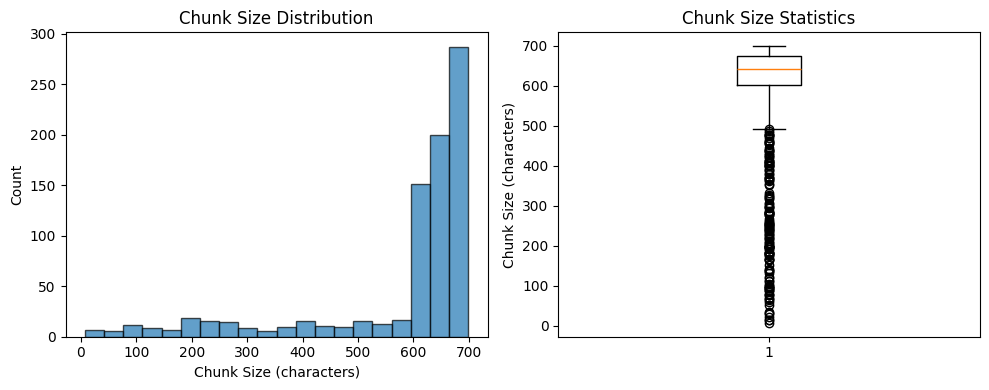


Chunk Statistics:
  - Min size: 7 chars
  - Max size: 699 chars
  - Mean size: 578 chars
  - Total chunks: 837


## Vector Store Management

### Creating FAISS Vector Store

Processing 837 chunks...
FAISS index saved to: ./data/faiss_index
Vector store created successfully


## Building RAG Pipeline

Error in variant 4: Could not import rank_bm25, please install with `pip install rank_bm25`.

Sample results:
  variant_id                   timestamp loader       chunker  \
0   7d625d50  2025-07-23T23:28:45.211349   text  semantic_700   
1   7d625d50  2025-07-23T23:28:45.211349   text  semantic_700   
2   7d625d50  2025-07-23T23:28:45.211349   text  semantic_700   
3   a960f854  2025-07-23T23:30:04.803113   text  semantic_700   
4   a960f854  2025-07-23T23:30:04.803113   text  semantic_700   

                       embedding storage  retrieval          generation  \
0  openai_text-embedding-3-small   faiss  vector_k3  openai_gpt-4o-mini   
1  openai_text-embedding-3-small   faiss  vector_k3  openai_gpt-4o-mini   
2  openai_text-embedding-3-small   faiss  vector_k3  openai_gpt-4o-mini   
3  openai_text-embedding-3-small   faiss  vector_k5  openai_gpt-4o-mini   
4  openai_text-embedding-3-small   faiss  vector_k5  openai_gpt-4o-mini   

                                  question  \
0 

In [5]:
# Run grid search
runner = ExperimentRunner()
results_df = await runner.run_grid_search(
    base_config=base_config,
    variants=variants,
    test_questions=test_questions,
    document_path=DOCUMENT_PATH
)

# Display sample results
print("\nSample results:")
print(results_df.head())

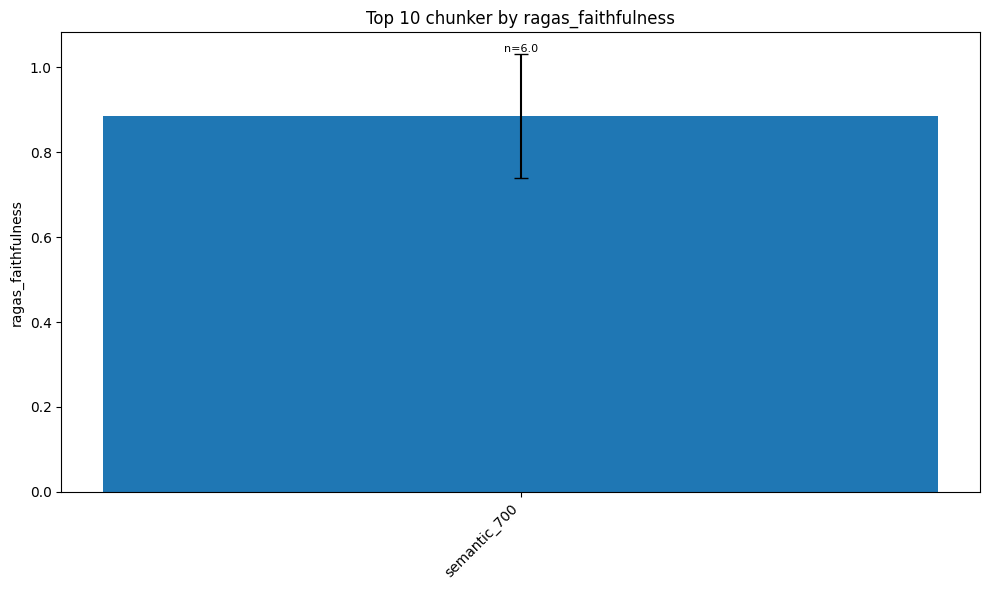

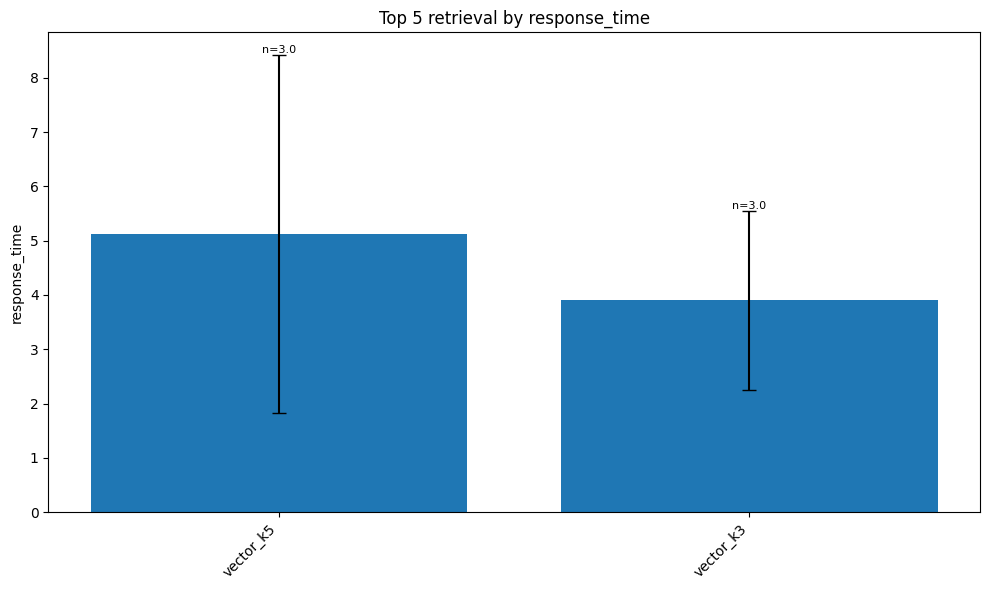

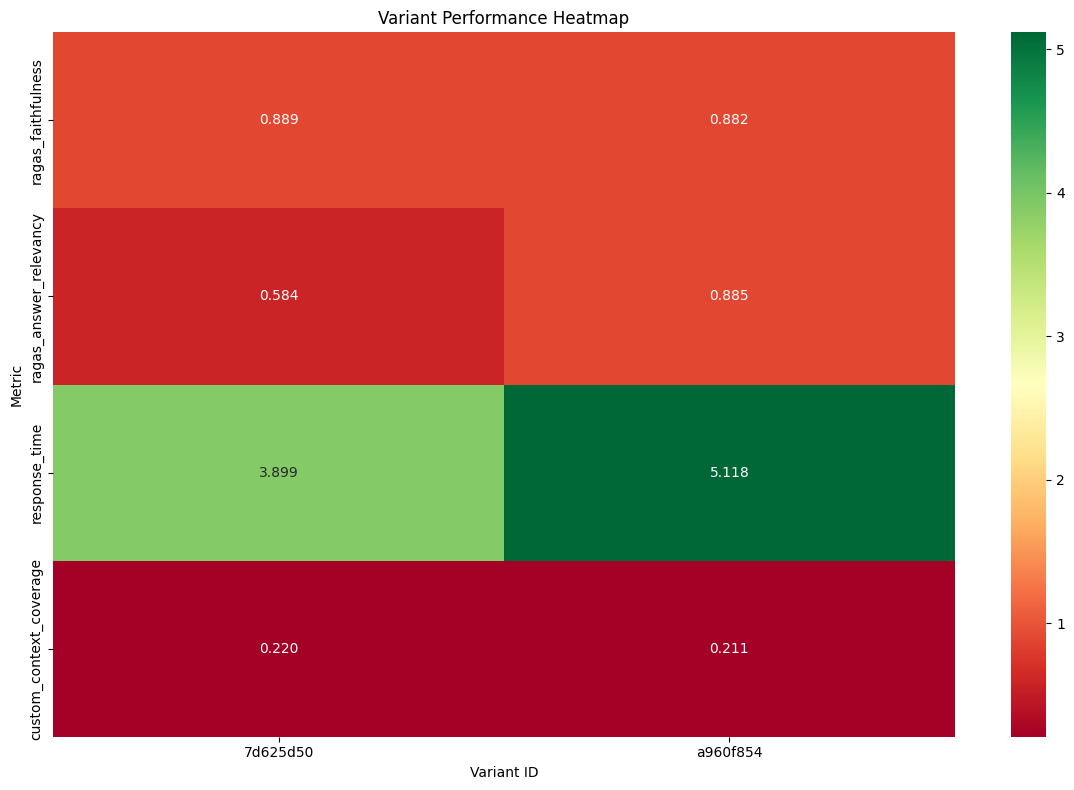

Best configuration: a960f854
Score: 0.741

Configuration details:
  loader: text
  chunker: semantic_700
  embedding: openai_text-embedding-3-small
  storage: faiss
  retrieval: vector_k5
  generation: openai_gpt-4o-mini


In [6]:
# Initialize analyzer
analyzer = ExperimentAnalyzer()

# Load results (if running in a new session)
# results_df = analyzer.load_results()

# Compare chunking methods by faithfulness
analyzer.compare_variants(
    df=results_df,
    metric="ragas_faithfulness",
    groupby="chunker",
    top_n=10
)

# Compare retrieval strategies by response time
analyzer.compare_variants(
    df=results_df,
    metric="response_time", 
    groupby="retrieval",
    top_n=5
)

# Create performance heatmap
metrics_to_analyze = [
    "ragas_faithfulness",
    "ragas_answer_relevancy",
    "response_time",
    "custom_context_coverage"
]

heatmap_df = analyzer.create_heatmap(results_df, metrics_to_analyze)

# Find best configuration with weighted metrics
best_config = analyzer.find_best_configuration(
    df=results_df,
    metrics=["ragas_faithfulness", "ragas_answer_relevancy"],
    weights={
        "ragas_faithfulness": 0.6,
        "ragas_answer_relevancy": 0.4
    }
)

KeyError: 'retrieval.top_k'

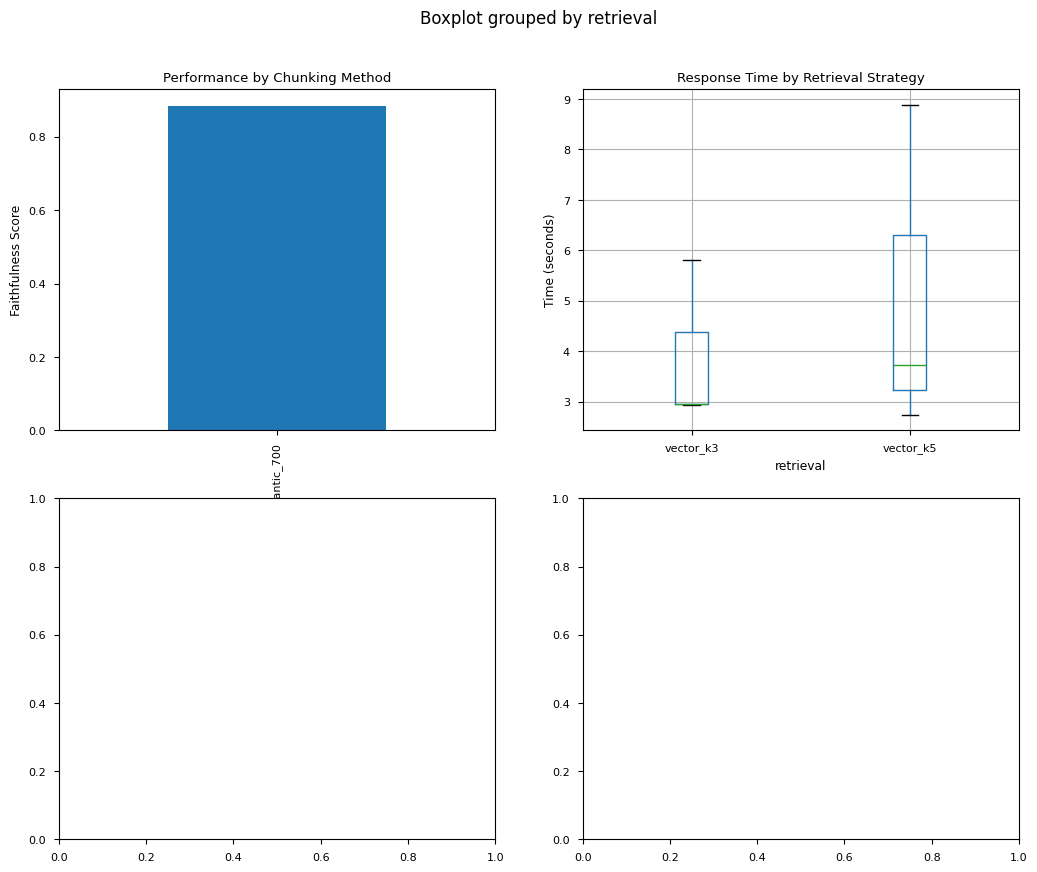

In [7]:
# Export to CSV
results_df.to_csv("experiment_results.csv", index=False)

# Export summary statistics
summary_stats = results_df.groupby(['chunker', 'retrieval']).agg({
    'ragas_faithfulness': ['mean', 'std'],
    'response_time': ['mean', 'std'],
    'num_contexts': 'mean'
}).round(3)

summary_stats.to_excel("experiment_summary.xlsx")

# Create publication-ready visualizations
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-paper')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Chunking method comparison
ax1 = axes[0, 0]
chunker_perf = results_df.groupby('chunker')['ragas_faithfulness'].mean()
chunker_perf.plot(kind='bar', ax=ax1)
ax1.set_title('Performance by Chunking Method')
ax1.set_ylabel('Faithfulness Score')

# Plot 2: Response time distribution
ax2 = axes[0, 1]
results_df.boxplot(column='response_time', by='retrieval', ax=ax2)
ax2.set_title('Response Time by Retrieval Strategy')
ax2.set_ylabel('Time (seconds)')

# Plot 3: Top K analysis
ax3 = axes[1, 0]
k_analysis = results_df.groupby('retrieval.top_k')[
    ['ragas_faithfulness', 'ragas_answer_relevancy']
].mean()
k_analysis.plot(ax=ax3, marker='o')
ax3.set_title('Performance vs. Top K')
ax3.set_xlabel('Top K')
ax3.set_ylabel('Score')

# Plot 4: Temperature effect
ax4 = axes[1, 1]
temp_analysis = results_df.groupby('generation.temperature')[
    'ragas_answer_relevancy'
].mean()
temp_analysis.plot(kind='line', marker='s', ax=ax4)
ax4.set_title('Temperature vs. Answer Relevancy')
ax4.set_xlabel('Temperature')
ax4.set_ylabel('Relevancy Score')

plt.tight_layout()
plt.savefig('experiment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Generate LaTeX table for report
latex_table = summary_stats.to_latex(
    caption="RAG Pipeline Performance by Configuration",
    label="tab:rag_performance"
)
print(latex_table)